## Genetic Algorithm

- Generate Population
- Loop in
    1. check fitness
    2. cross
    3. mutation

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6] # specifying the size for each and every matplotlib plot globally

In [15]:
# defining list objects with range of the graph
x1_range = [-100,100]
x2_range = [-100,100]

In [81]:
x1_range

[-100, 100]

In [9]:
# empty list object to store the population
population = []

In [10]:
# this function is used to generate the population and appending it to the population list defined above
# it takes the attributes as no. of features in a population and size that we have in it
def populate(features, size=1000):
    
    initial = [] # here we are defining the coordinate for each entity in a population
    
    for _ in range(size):
        entity = []
        for feature in features:
            val = np.random.randint(*feature)
            #print(val)
            #print(feature)
            entity.append(val)
        initial.append(entity)
    
    return np.array(initial)

In [11]:
population = populate([x1_range, x2_range])

In [12]:
population.shape

(1000, 2)

In [86]:
population[:5]

array([[  41,   90],
       [ -63,   13],
       [ -25, -100],
       [  27,  -45],
       [ -37,  -19]])

In [5]:
# defining the virus in the form of numpy array
virus = np.array([5,5])

In [88]:
virus.shape

(2,)

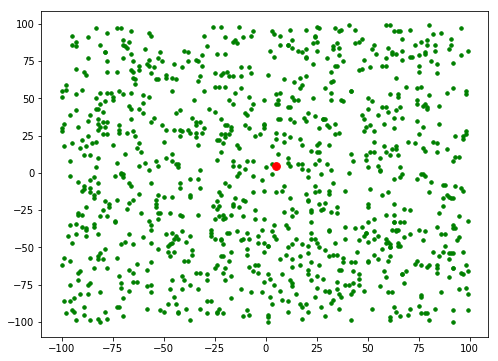

In [13]:
# printing the random generated population and a virus placed in it
plt.scatter(population[:,0], population[:,1], c='green',s=12)
plt.scatter(virus[0], virus[1],c='red',s=60)

In [94]:
# only the 100 fit ones will survive in this one
def fitness(population,virus,size=100):
    
    scores = []
    for index,entity in enumerate(population):  # enumerate also provides the index as for the iterator
        score = np.sum((entity-virus)**2)
        scores.append((score,index))
    
    scores = sorted(scores)[:size]
    
    return np.array(scores)[:,1]

In [96]:
def draw(population,virus):
    plt.xlim((-100,100))
    plt.ylim((-100,100))
    plt.scatter(population[:,0], population[:,1], c='green',s=12)
    plt.scatter(virus[0], virus[1],c='red',s=60)  

In [132]:
def reduction(population, virus, size=100):
    fittest = fitness(population,virus,size) # only the index of the fittest ones is returned in sorted format

    new_pop = []
    
    for item in fittest:
        new_pop.append(population[item])
        
    return np.array(new_pop)

In [131]:
population = reduction(population,virus)
# only the fittest 100 are now present in the population after reduction of population from 1000

In [98]:
population

array([[  3,   1],
       [  2,  10],
       [ -1,   4],
       [ -1,   3],
       [ 10,   9],
       [  1,  13],
       [ 14,   9],
       [  4,  15],
       [ -4,  13],
       [ -6,   0],
       [ -7,   2],
       [  0,  -7],
       [  7,  18],
       [ 14,  15],
       [ -7,  -2],
       [ 19,   5],
       [ 15,  -5],
       [  3,  19],
       [ 11,  19],
       [ -3,  -8],
       [  3, -11],
       [ 17,  16],
       [ 13, -10],
       [ -1,  23],
       [  3, -14],
       [-10,  17],
       [ 20,  18],
       [-10,  18],
       [ 25,   4],
       [ 22,  -6],
       [ -9,  20],
       [-15,  -1],
       [ 16, -13],
       [ -6,  23],
       [ 15, -14],
       [-10, -11],
       [ 23,  18],
       [ 17,  24],
       [-11, -11],
       [-13,  -9],
       [-13,  -9],
       [ -4,  26],
       [ 28,   5],
       [-16,  -6],
       [ 22,  22],
       [ -5, -17],
       [ 29,   1],
       [-15,  19],
       [ 24,  21],
       [-20,   3],
       [ 30,   2],
       [  8, -20],
       [ 25,

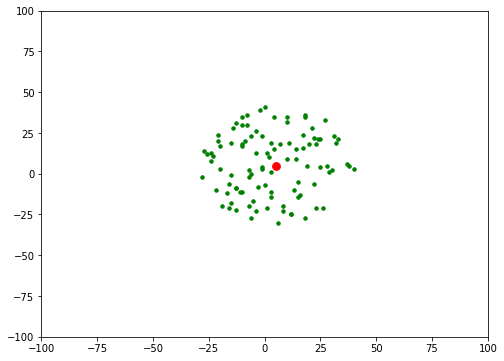

In [99]:
draw(population, virus)

In [111]:
# cross mutation in order to generate the next generation of the population which will be more immune to virus than previous
def cross(population, size=1000):
    
    new_pop = []
    
    for _ in range(size):
        p = population[np.random.randint(0,len(population))]
        m = population[np.random.randint(0,len(population))]
    
        # we are only considering half of each without considering random selection
        entity = []
        entity.append(*p[:len(p)//2])
        entity.append(*m[len(m)//2:])
        
        new_pop.append(entity)
    
    return np.array(new_pop)

# generating and adding the random features to the entity so that it looks more distributed
def mutate(population):
    
    return population + np.random.randint(-10,10,2000).reshape(1000,2)

In [115]:
population = cross(population)

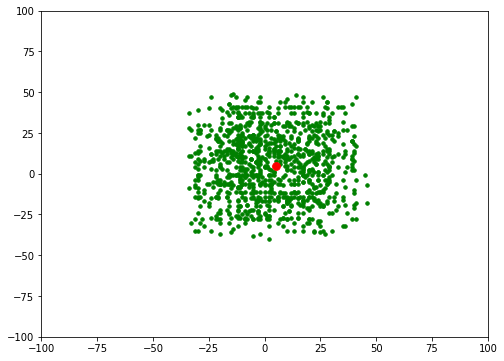

In [116]:
draw(population,virus)

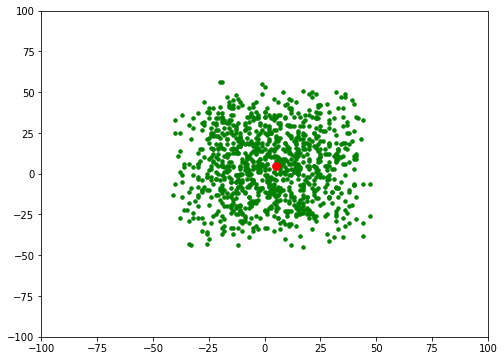

In [117]:
population = mutate(population)

draw(population,virus)

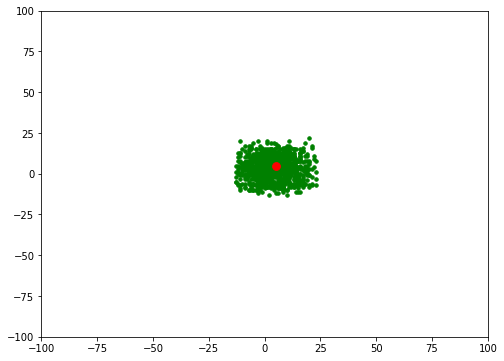

In [145]:
# the complete cycle of the above steps

population = populate([x1_range,x2_range],1000)
def cycle(population, virus, gens=2):  # gens is the number of generation
    
    for _ in range(gens):
        population = reduction(population,virus,100)
        population = cross(population,1000)
        population = mutate(population)
        
    return population

population = cycle(population,virus)

draw(population,virus)

In [141]:
#lo = population[np.random.randint(0,len(population))]

In [140]:
#lo